In [2]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

Pepper__bell___Bacterial_spot: 997 images
Pepper__bell___healthy: 1478 images
Potato___Early_blight: 1000 images
Potato___Late_blight: 1000 images
Potato___healthy: 152 images
Tomato_Bacterial_spot: 2127 images
Tomato_Early_blight: 1000 images
Tomato_Late_blight: 1909 images
Tomato_Leaf_Mold: 952 images
Tomato_Septoria_leaf_spot: 1771 images
Tomato_Spider_mites_Two_spotted_spider_mite: 1676 images
Tomato__Target_Spot: 1404 images
Tomato__Tomato_YellowLeaf__Curl_Virus: 3208 images
Tomato__Tomato_mosaic_virus: 373 images
Tomato_healthy: 1591 images


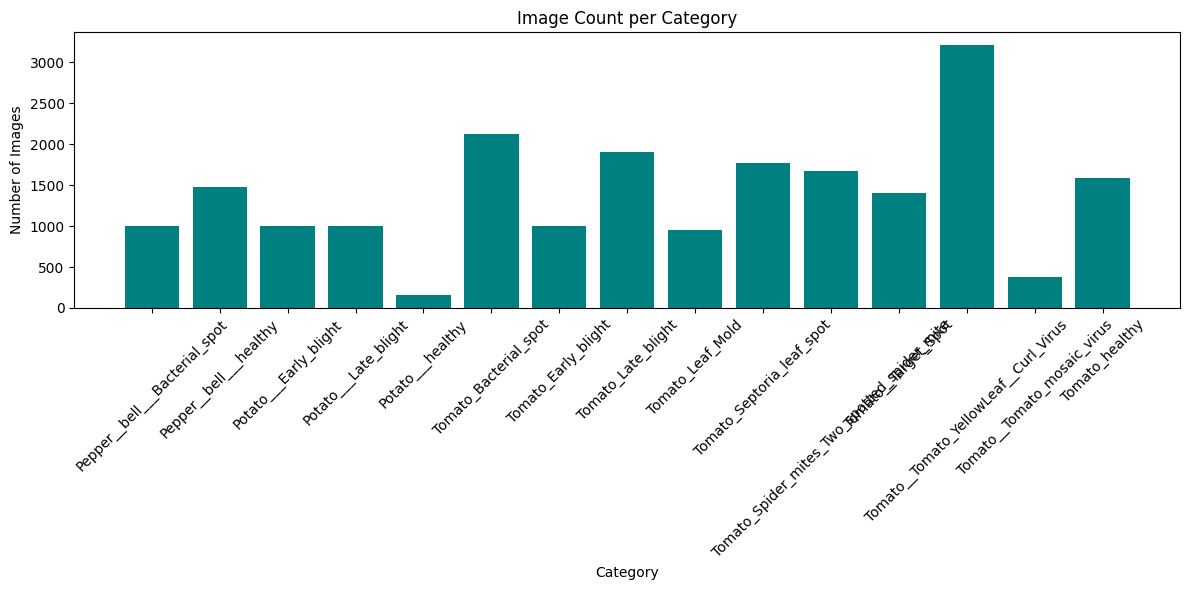

In [3]:
import os
import matplotlib.pyplot as plt

# Set dataset path
dataset_path = "/content/drive/MyDrive/NNDL/PlantVillage"

# List categories
categories = sorted(os.listdir(dataset_path))
image_counts = []

# Count images in each category
for category in categories:
    category_path = os.path.join(dataset_path, category)
    image_files = [f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    image_counts.append(len(image_files))
    print(f"{category}: {len(image_files)} images")

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(categories, image_counts, color='teal')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Image Count per Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:

# Use Path object instead of string
from pathlib import Path

# Get class names (folder names)
classes = sorted(os.listdir(dataset_path))

# Initialize empty lists
images_list = []
labels_list = []

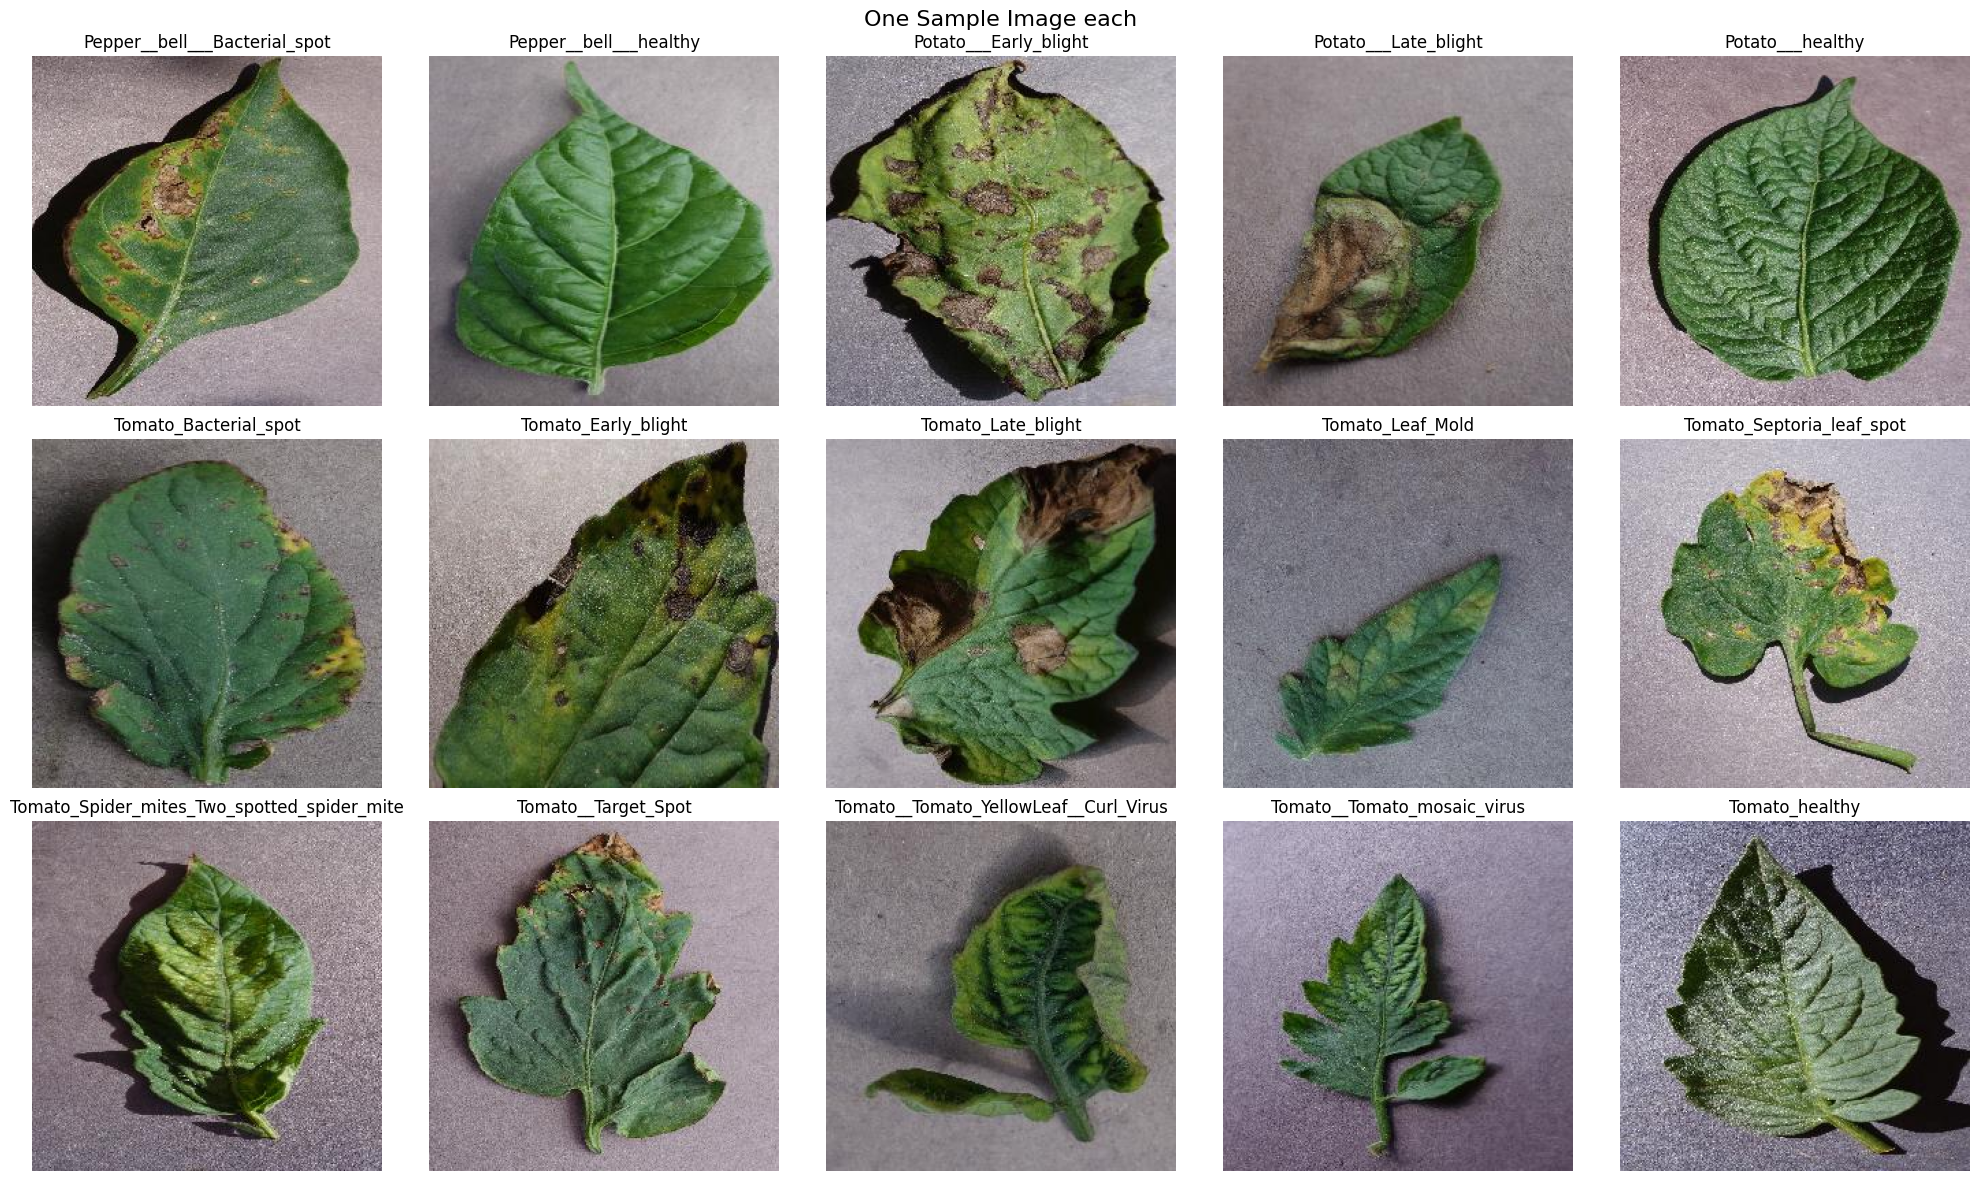

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# List categories
categories = sorted(os.listdir(dataset_path))

# Filter categories that actually have images
valid_samples = []
for category in categories:
    category_path = os.path.join(dataset_path, category)
    image_files = [f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if image_files:
        first_image_path = os.path.join(category_path, image_files[0])
        valid_samples.append((category, first_image_path))

# Plotting setup: 3 rows, auto-adjust columns
num_images = len(valid_samples)
rows = 3
cols = (num_images + rows - 1) // rows  # ceil division

plt.figure(figsize=(cols * 4, rows * 4))

for i, (category, img_path) in enumerate(valid_samples):
    img = Image.open(img_path)

    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(category)

plt.suptitle("One Sample Image each", fontsize=16)
plt.tight_layout()
plt.show()

In [6]:
# Load images and labels
images_list = []  # Re-initialize to ensure it's empty
labels_list = []  # Re-initialize to ensure it's empty

for i, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    for image_file in os.listdir(class_path):
        if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(class_path, image_file)

            # Ensure all images are converted to RGB
            image = Image.open(image_path).convert('RGB').resize((128, 128))  # Resize and convert to RGB

            image_array = np.array(image)
            images_list.append(image_array)
            labels_list.append(i)  # Use class index as label

In [ ]:
# Convert lists to NumPy arrays after loading all images
images_array = np.array(images_list)
labels_array = np.array(labels_list)

# Split the dataset into training and testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(images_array, labels_array, test_size=0.2, random_state=42)

# CNN with BatchNorm + L2 + Dropout.

In [7]:
from tensorflow import keras
from tensorflow.keras import layers, models

# Define the model
input_shape = (128, 128, 3)  # Image dimensions and color channels (RGB)
dropout_rate = 0.3

model_2 = keras.models.Sequential([ # Changed models to keras.models
    # First Convolutional Layer
    keras.layers.Conv2D(filters=128, kernel_size=(5, 5), padding='valid', activation="relu", input_shape=input_shape), # Changed layers to keras.layers
    keras.layers.MaxPooling2D(pool_size=(2, 2)), # Changed layers to keras.layers
    keras.layers.BatchNormalization(), # Changed layers to keras.layers

    # Second Convolutional Layer
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation="relu", kernel_regularizer=l2(0.00005)), # Changed layers to keras.layers
    keras.layers.MaxPooling2D(pool_size=(2, 2)), # Changed layers to keras.layers
    keras.layers.BatchNormalization(), # Changed layers to keras.layers

    # Third Convolutional Layer
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='valid', activation="relu", kernel_regularizer=l2(0.00005)), # Changed layers to keras.layers
    keras.layers.MaxPooling2D(pool_size=(2, 2)), # Changed layers to keras.layers
    keras.layers.BatchNormalization(), # Changed layers to keras.layers

    # Flatten Layer
    keras.layers.Flatten(), # Changed layers to keras.layers

    # Dense Layer
    keras.layers.Dense(units=256, activation='relu'), # Changed layers to keras.layers
    keras.layers.Dropout(dropout_rate), # Changed layers to keras.layers

    # Output Layer
    keras.layers.Dense(units=len(classes), activation='softmax')  # Output units equal to number of categories # Changed layers to keras.layers
])

# Compile the model
model_2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 124, 124, 128)  │         9,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 60, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,712,623 (6.53 MB)

 Trainable params: 1,712,175 (6.53 MB)

 Non-trainable params: 448 (1.75 KB)

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
# Callbacks
callbacks = [
    # Save the best model based on validation accuracy
    ModelCheckpoint('/content/drive/MyDrive/NNDL/PlantVillage_model_best.h5',
                    monitor='val_accuracy',
                    save_best_only=True,
                    mode='max',
                    verbose=1),

    # Stop training when validation accuracy stops improving
    EarlyStopping(monitor='val_accuracy',
                  patience=5,  # Number of epochs with no improvement before stopping
                  mode='max',
                  verbose=1),

    # Reduce learning rate when validation accuracy plateaus
    ReduceLROnPlateau(monitor='val_loss',
                      factor=0.5,  # Reduce LR by 50%
                      patience=3,  # Wait for 3 epochs of no improvement
                      verbose=1,
                      mode='min',
                      min_lr=1e-6)  # Set minimum learning rate
]

In [10]:
# Train the model with callbacks
history = model_2.fit(
    X_train, y_train,
    epochs=10,  # Number of epochs
    validation_data=(X_test, y_test),  # Validation data
    callbacks=callbacks  # Include callbacks in training
)

Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5847 - loss: 1.5103
Epoch 1: val_accuracy improved from -inf to 0.37112, saving model to /content/drive/MyDrive/NNDL/PlantVillage_model_best.h5


516/516 ━━━━━━━━━━━━━━━━━━━━ 35s 50ms/step - accuracy: 0.5849 - loss: 1.5096 - val_accuracy: 0.3711 - val_loss: 6.5053 - learning_rate: 0.0010
Epoch 2/10
515/516 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8070 - loss: 0.6039
Epoch 2: val_accuracy improved from 0.37112 to 0.42345, saving model to /content/drive/MyDrive/NNDL/PlantVillage_model_best.h5


516/516 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.8070 - loss: 0.6038 - val_accuracy: 0.4234 - val_loss: 6.0001 - learning_rate: 0.0010
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8706 - loss: 0.4085
Epoch 3: val_accuracy improved from 0.42345 to 0.73183, saving model to /content/drive/MyDrive/NNDL/PlantVillage_model_best.h5


516/516 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.8706 - loss: 0.4085 - val_accuracy: 0.7318 - val_loss: 1.7492 - learning_rate: 0.0010
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9066 - loss: 0.3034
Epoch 4: val_accuracy improved from 0.73183 to 0.82534, saving model to /content/drive/MyDrive/NNDL/PlantVillage_model_best.h5


516/516 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.9066 - loss: 0.3034 - val_accuracy: 0.8253 - val_loss: 1.2285 - learning_rate: 0.0010
Epoch 5/10
515/516 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9299 - loss: 0.2274
Epoch 5: val_accuracy did not improve from 0.82534
516/516 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9298 - loss: 0.2275 - val_accuracy: 0.6594 - val_loss: 2.8823 - learning_rate: 0.0010
Epoch 6/10
515/516 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9295 - loss: 0.2147
Epoch 6: val_accuracy did not improve from 0.82534
516/516 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9295 - loss: 0.2147 - val_accuracy: 0.5477 - val_loss: 4.9903 - learning_rate: 0.0010
Epoch 7/10
515/516 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9477 - loss: 0.1736
Epoch 7: val_accuracy improved from 0.82534 to 0.82922, saving model to /content/drive/MyDrive/NNDL/PlantVillage_model_best.h5



Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
516/516 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.9477 - loss: 0.1736 - val_accuracy: 0.8292 - val_loss: 1.3646 - learning_rate: 0.0010
Epoch 8/10
515/516 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9637 - loss: 0.1187
Epoch 8: val_accuracy improved from 0.82922 to 0.93241, saving model to /content/drive/MyDrive/NNDL/PlantVillage_model_best.h5


516/516 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.9637 - loss: 0.1187 - val_accuracy: 0.9324 - val_loss: 1.8936 - learning_rate: 5.0000e-04
Epoch 9/10
515/516 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9764 - loss: 0.0837
Epoch 9: val_accuracy did not improve from 0.93241
516/516 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9764 - loss: 0.0837 - val_accuracy: 0.8593 - val_loss: 3.0971 - learning_rate: 5.0000e-04
Epoch 10/10
515/516 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9796 - loss: 0.0739
Epoch 10: val_accuracy did not improve from 0.93241

Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
516/516 ━━━━━━━━━━━━━━━━━━━━ 39s 37ms/step - accuracy: 0.9796 - loss: 0.0739 - val_accuracy: 0.8668 - val_loss: 2.8942 - learning_rate: 5.0000e-04


In [13]:
# Evaluate the model on the test data
val_loss, val_accuracy = model_2.evaluate(X_test, y_test)
print(f"Test Loss: {val_loss}")
print(f"Test Accuracy: {val_accuracy}")


129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8648 - loss: 3.0837
Test Loss: 2.8942413330078125
Test Accuracy: 0.8667635917663574


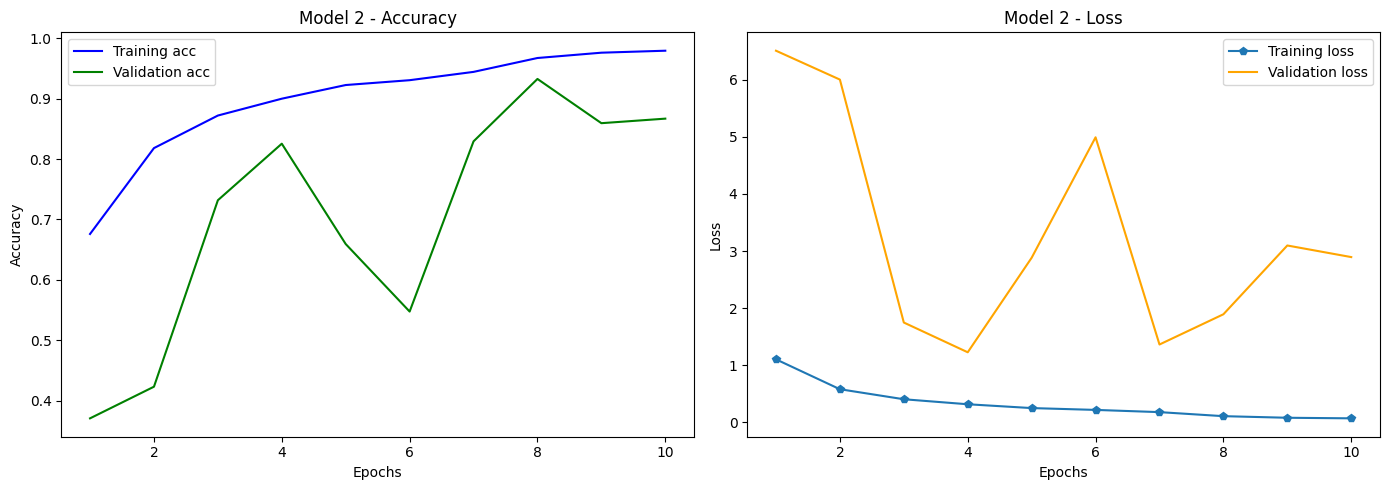

In [20]:
import matplotlib.pyplot as plt

def plot_history(history, title="Model 2"):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Accuracy plot with updated colors
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training acc')
    plt.plot(epochs, val_acc, 'g-', label='Validation acc')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot with updated colors
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'p-', label='Training loss')
    plt.plot(epochs, val_loss, 'orange', label='Validation loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


model_2.save('/content/drive/MyDrive/NNDL/PlantVillage_model_final.h5')
plot_history(history)


129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


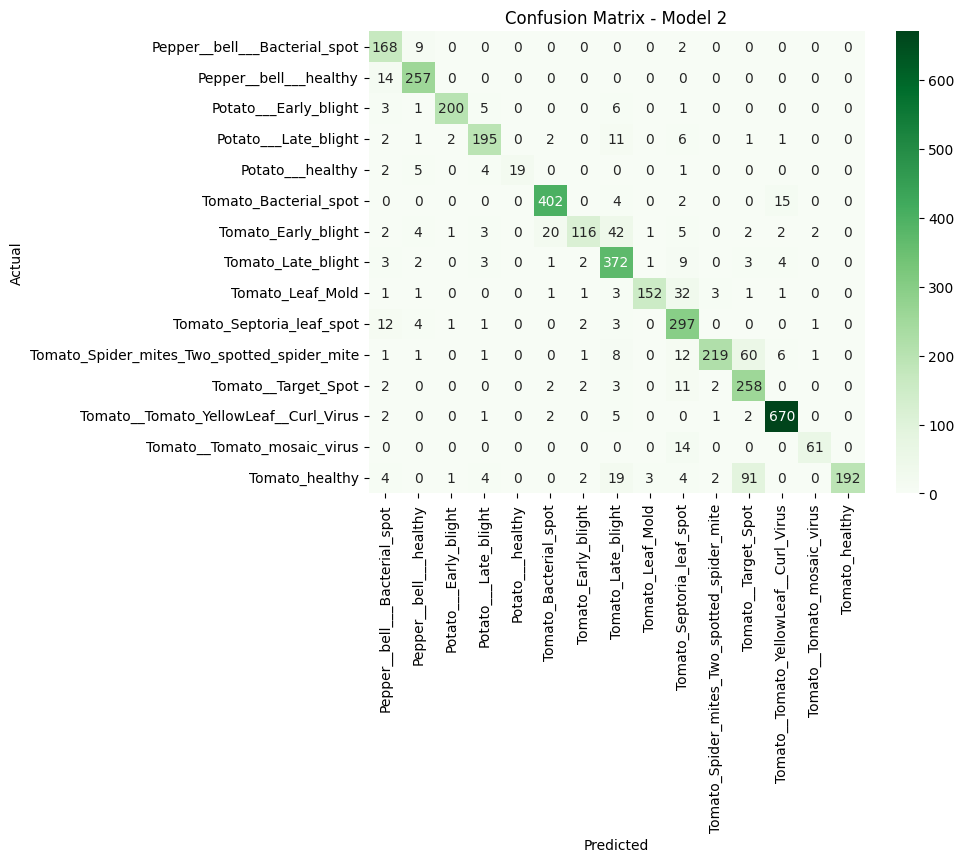

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Get predictions from the model
y_pred_probs = model_2.predict(X_test)
y_pred_labels_4 = np.argmax(y_pred_probs, axis=1)  # Get the class with highest probability

cm = confusion_matrix(y_test, y_pred_labels_4)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix - Model 2")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

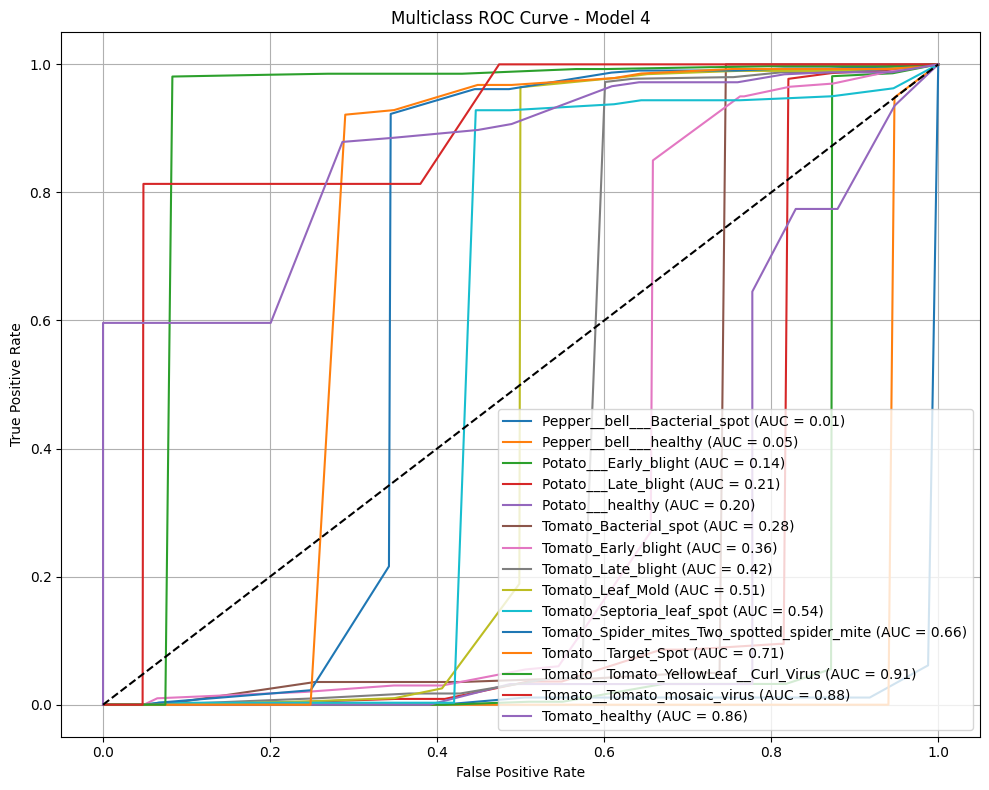

In [22]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import LabelBinarizer

# Binarize the output
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# If only 1 output (binary), fix shape
if y_test_bin.shape[1] == 1:
    y_test_bin = np.hstack((1 - y_test_bin, y_test_bin))

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_labels_4) # Fix: Remove the extra index from y_pred_labels_4
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.title('Multiclass ROC Curve - Model 4')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()